In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def solve(f, t, x0, t0_index, iter=8):
    return x

In [26]:
def f(t, x):
  return x + 2*t

x0 = -2.
n = 1000
t_range = (-1, 1)
t = np.linspace(t_range[0], t_range[1], n)

In [7]:
%%time
x = solve(f, t, x0, t0_index=n//2, iter=50)

CPU times: user 6.51 s, sys: 278 ms, total: 6.78 s
Wall time: 6.73 s


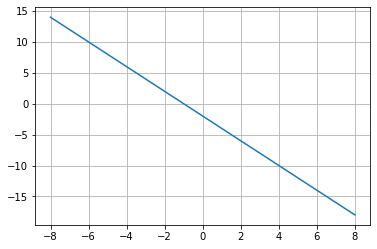

In [8]:
plt.plot(t, x)
plt.grid()

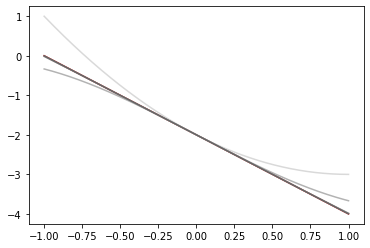

In [27]:
def f(t, x):
  return x + 2*t

x0 = -2.
n = 1000
t_range = (-1, 1)
t = np.linspace(t_range[0], t_range[1], n)

iters = [2**i for i in range(4)]
plt.plot(t, exact(t), color="red")
for i, iter in enumerate(iters):
    t = np.concatenate((np.linspace(t_range[0], t0, n//2), np.linspace(t0, t_range[1], n//2)))
    x = solve(f, t, x0, n // 2, iter=iter)
    plt.plot(t, x, color=f'{1 - (0.15 + 0.6 * i / len(iters))}')

# Zależność błędu od *dt* i liczby iteracji

In [19]:
def error(estimated, exact):
    return np.max(np.abs(exact - estimated))


def plot_errors(x0, t0, t_range, f, exact, iters_len, n_points_len):
    iters = [2**i for i in range(iters_len)]
    n_points = [10**(1+i) for i in range(n_points_len)]
    for i, n in enumerate(n_points):
        errors = []
        for iter in iters:
            t = np.concatenate((np.linspace(t_range[0], t0, n // 2), np.linspace(t0, t_range[1], n // 2)))
            x = solve(f, t, x0, n // 2, iter=iter)
            errors.append(error(x, exact(t)))
        plt.plot(iters, errors, color=f'{1 - (0.15 + 0.6 * i / len(n_points))}')
    plt.loglog()
    plt.grid()
    plt.show()

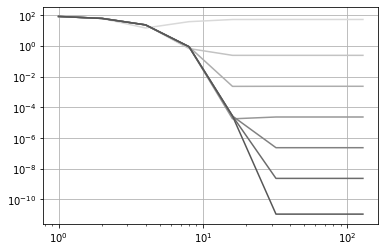

CPU times: user 36.6 s, sys: 450 ms, total: 37.1 s
Wall time: 37.2 s


In [20]:
%%time
# < 16s
x0 = 0.
t0 = 0.

def exact(t):
    return (2+x0) * np.exp(t) - 2 * t - 2

@numba.njit()
def f(t, x):
    return x + 2*t

t_start = -4
t_stop = 4

plot_errors(x0, t0, (t_start, t_stop), f, exact, iters_len=8, n_points_len=7)